<a href="https://colab.research.google.com/github/SergeiShelgov/DetectBubble/blob/main/DetectBubble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка изображения

697 1024


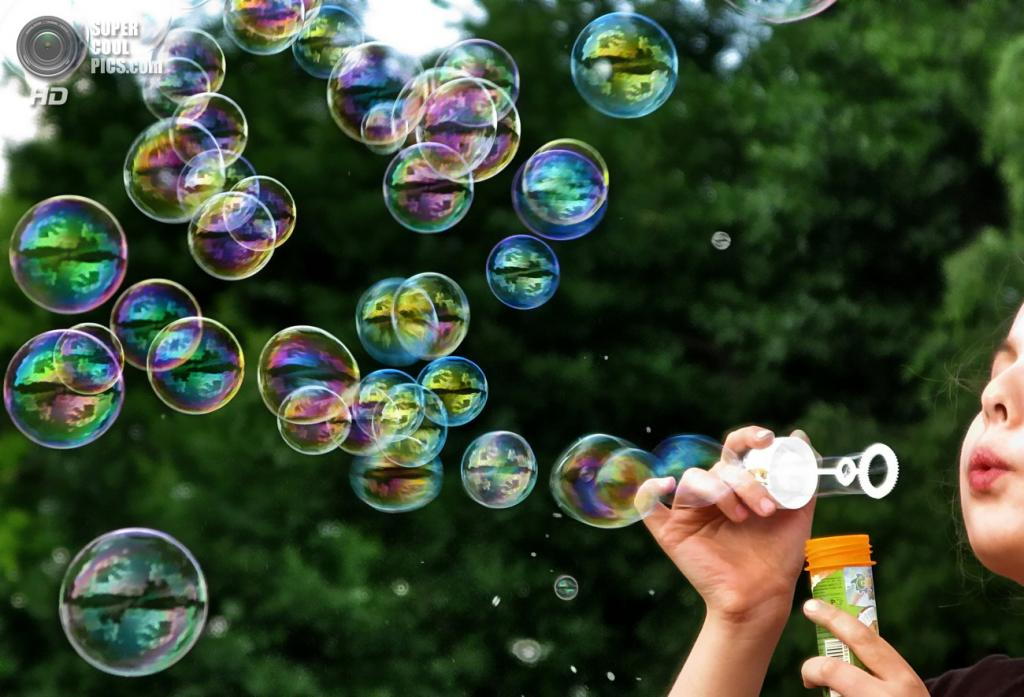

In [ ]:
import cv2
import numpy as np
import requests
from google.colab.patches import cv2_imshow
import imutils
import itertools
from PIL import Image
url = r'https://pravdapfo.ru/sites/default/files/mylnyepuzyri.jpg'
#url=r'https://media-cldnry.s-nbcnews.com/image/upload/t_nbcnews-fp-1200-630,f_auto,q_auto:best/rockcms/2022-01/220121-soap-bubbles-stock-mn-1200-86cbf9.jpg'
#url=r'https://ak.picdn.net/shutterstock/videos/11694011/thumb/1.jpg'
#url=r'https://ds14.edu.korolev.ru/wp-content/uploads/sites/69/2019/07/PykjOAC.jpeg'
#url=r'https://ds05.infourok.ru/uploads/ex/1225/00123a94-eb5aaca3/hello_html_578c000.jpg'
#url=r'https://image.jimcdn.com/app/cms/image/transf/none/path/s2c4698fd1dc61ef1/image/iaa0407345289d80a/version/1527364708/%D0%BC%D1%8B%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5-%D0%BF%D1%83%D0%B7%D1%8B%D1%80%D0%B8-%D0%BA%D1%83%D0%BF%D0%B8%D1%82%D1%8C-%D0%B2-%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8.jpg'
resp = requests.get(url, stream=True).raw
image= np.asarray(bytearray(resp.read()), dtype="uint8")
image= cv2.imdecode(image, cv2.IMREAD_COLOR)
imbit=cv2.bitwise_not(image)

dimensions = image.shape
height = image.shape[0]
width = image.shape[1]
print(height,width)
cv2_imshow(image)

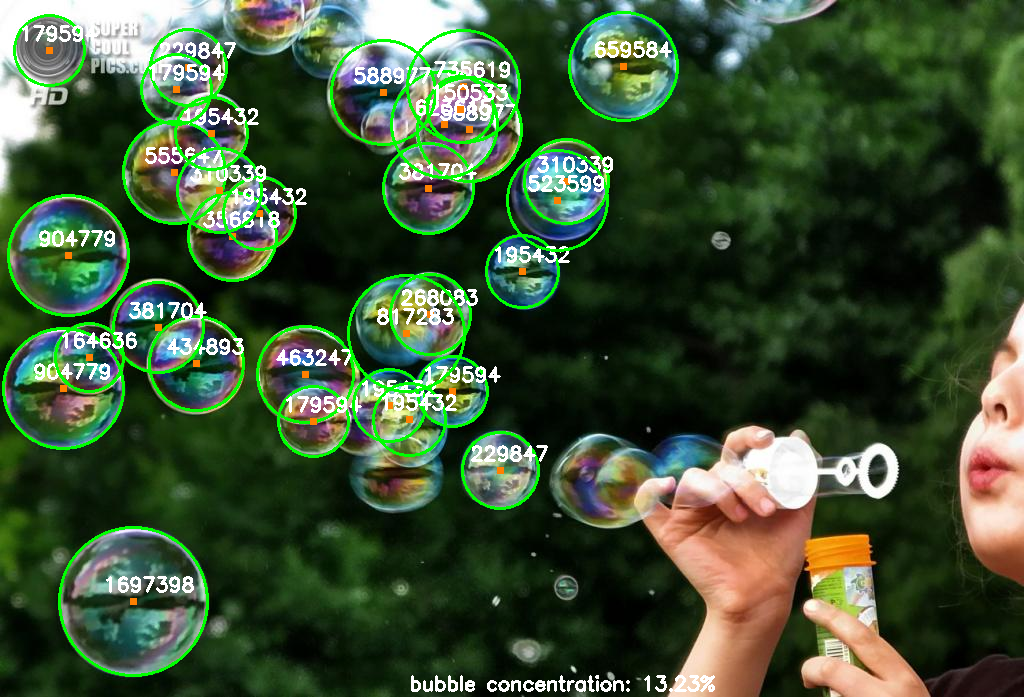

In [ ]:
output = image.copy()
radiusy=[]
Vpusyrei=[]
#медиан
imgblur = cv2.medianBlur(output, 3)
#оттенки серого
gray = cv2.cvtColor(imgblur, cv2.COLOR_BGR2GRAY)
kernel = np.ones((2, 2), 'uint8')
#эрозия
erode_img = cv2.erode(gray, kernel, cv2.BORDER_REFLECT, iterations=1)

# находим круги на картинке
circles = cv2.HoughCircles(erode_img, cv2.HOUGH_GRADIENT, 1.3, 20,param1=290,param2=59,maxRadius=110,minRadius=1)
#circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.4, 25,param1=350,param2=55,maxRadius=75,minRadius=25)
#param1=300,param2=65
# если найден хотя бы один круг
if circles is not None:
	# преобразовываем координаты x,y и радиус в целые числа
	circles = np.round(circles[0, :]).astype("int")
	# цикл по координатам и радиусу
	for (x, y, r) in circles:
		#добавляем каждый радиус в список
		radiusy.append(r)
		# рисуем круг затем квадрат, обозначающий центр круга
		cv2.circle(output, (x, y), r, (0, 255, 0), 2)
		cv2.rectangle(output, (x - 3, y - 3), (x + 3, y + 3), (0, 128, 255), -1)
    #считаем объем каждого пузыря
		V=np.round((4*np.pi*r**3)/3).astype("int")
	  #Прикрепляем значение объема
		cv2.putText(output, "{:.0f}".format(V),(int(x-30), int(y - 10)), cv2.FONT_HERSHEY_SIMPLEX,0.65, (255, 255, 255), 2)
		#Добавляем объем каждого пузыря в список
		Vpusyrei.append(V)
#диаметр пузыря с большим радиусом
Diametr=max(radiusy) * 2
#объем всей картинки
Vkartinki = Diametr * height * width
#print(Vkartinki)
#print(Vpusyrei)
#сумма объемов всех пузырей
SumVpusyrei=sum(Vpusyrei)
#print(SumVpusyrei)
#концентрация
concentration=np.round((SumVpusyrei/Vkartinki)*100,2)
cv2.putText(output,"bubble concentration: {:.2f}%".format(concentration),(int(width/2.5), int(height/1.01)), cv2.FONT_HERSHEY_SIMPLEX,0.65, (255, 255, 255), 2)
#print(concentration)

cv2_imshow(output)